In [2]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import RandomOverSampler  # 
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# from imblearn.over_sampling import SMOTE,ADASYN

In [3]:
df = pd.read_csv('German Credit Dataset.csv')

In [4]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [5]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [7]:
Cat = []
Num = []

In [8]:
for i in df.drop('default',axis = 1,inplace = False).columns:
    if df[i].dtype == 'object':
        Cat.append(i)
    else:
        Num.append(i)

In [9]:
Cat

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing',
 'job',
 'phone']

In [10]:
Num

['months_loan_duration',
 'amount',
 'percent_of_income',
 'years_at_residence',
 'age',
 'existing_loans_count',
 'dependents']

In [11]:
for i in Cat:
    print(df[i].value_counts())
    print()

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64

credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64

purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64

savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64

employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64

other_credit
none     814
bank     139
store     47
Name: count, dtype: int64

housing
own      713
rent     179
other    108
Name: count, dtype: int64

job
skilled       630
unskilled     200
management    148
unemployed     22
Name: count, dtype: int64

phone
no

In [12]:
df['purpose'].replace('car0','car',inplace=True)

In [13]:
for i in Cat:
    print(df[i].value_counts(normalize = True))
    print()

checking_balance
unknown       0.394
< 0 DM        0.274
1 - 200 DM    0.269
> 200 DM      0.063
Name: proportion, dtype: float64

credit_history
good         0.530
critical     0.293
poor         0.088
very good    0.049
perfect      0.040
Name: proportion, dtype: float64

purpose
furniture/appliances    0.473
car                     0.349
business                0.097
education               0.059
renovations             0.022
Name: proportion, dtype: float64

savings_balance
< 100 DM         0.603
unknown          0.183
100 - 500 DM     0.103
500 - 1000 DM    0.063
> 1000 DM        0.048
Name: proportion, dtype: float64

employment_duration
1 - 4 years    0.339
> 7 years      0.253
4 - 7 years    0.174
< 1 year       0.172
unemployed     0.062
Name: proportion, dtype: float64

other_credit
none     0.814
bank     0.139
store    0.047
Name: proportion, dtype: float64

housing
own      0.713
rent     0.179
other    0.108
Name: proportion, dtype: float64

job
skilled       0.630
unskil

In [14]:
data = df.copy()

In [15]:
df_encoded = pd.get_dummies(df, columns = Cat,drop_first= False)

In [16]:
df_encoded.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,no,False,True,...,False,False,True,False,False,True,False,False,False,True
1,48,5951,2,2,22,1,1,yes,True,False,...,False,False,True,False,False,True,False,False,True,False
2,12,2096,2,3,49,1,2,no,False,False,...,False,False,True,False,False,False,False,True,True,False
3,42,7882,2,4,45,1,2,no,False,True,...,False,True,False,False,False,True,False,False,True,False
4,24,4870,3,4,53,2,2,yes,False,True,...,False,True,False,False,False,True,False,False,True,False


In [17]:
pd.set_option('display.max_column',None)

In [18]:
df_encoded['default'].replace(['yes','no'],[1,0],inplace = True)

In [19]:
df_encoded.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True
1,48,5951,2,2,22,1,1,1,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False
2,12,2096,2,3,49,1,2,0,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False
3,42,7882,2,4,45,1,2,0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False
4,24,4870,3,4,53,2,2,1,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False


In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   months_loan_duration             1000 non-null   int64
 1   amount                           1000 non-null   int64
 2   percent_of_income                1000 non-null   int64
 3   years_at_residence               1000 non-null   int64
 4   age                              1000 non-null   int64
 5   existing_loans_count             1000 non-null   int64
 6   dependents                       1000 non-null   int64
 7   default                          1000 non-null   int64
 8   checking_balance_1 - 200 DM      1000 non-null   bool 
 9   checking_balance_< 0 DM          1000 non-null   bool 
 10  checking_balance_> 200 DM        1000 non-null   bool 
 11  checking_balance_unknown         1000 non-null   bool 
 12  credit_history_critical          1000 non-null   

### Test_Train Split

In [21]:
X = df_encoded.drop("default" , axis=1)

y = df_encoded[["default"]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [23]:
X_train.shape

(750, 43)

In [24]:
X_test.shape

(250, 43)

### Building DT Model

In [25]:
dt_model = DecisionTreeClassifier()

In [26]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

### Model Evaluation

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [28]:
def evaluate_train_model(model):
    y_train_predict = model.predict(X_train)

    Acc_train = print(model.score(X_train,y_train))

    CM_train = print(sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_train = print(metrics.classification_report(y_train,y_train_predict))

    probs = model.predict_proba(X_train)
    probs = probs[:, 1]
    auc_train = roc_auc_score(y_train, probs)
    
    return Acc_train,CM_train,CR_train,auc_train  

In [29]:
def evaluate_test_model(model):
    y_test_predict = model.predict(X_test)

    Acc_test = print("The accuracy of the model is {}".format(model.score(X_test,y_test)))

    CM_test = print(sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_test = print(metrics.classification_report(y_test,y_test_predict))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    auc_test = roc_auc_score(y_test, probs)
    
    return Acc_test,CM_test,CR_test,auc_test

1.0
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00       226

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



(None, None, None, 1.0)

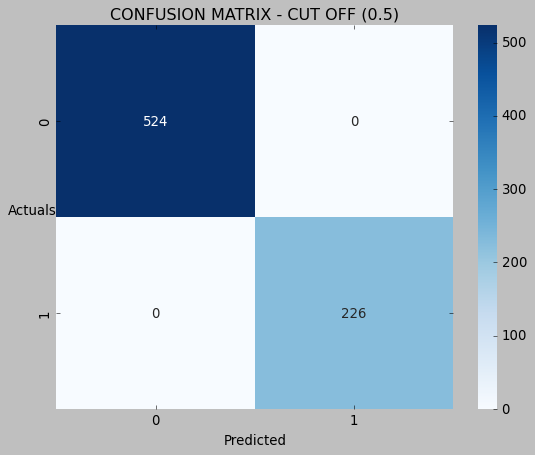

In [30]:
evaluate_train_model(dt_model)

The accuracy of the model is 0.668
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       176
           1       0.44      0.42      0.43        74

    accuracy                           0.67       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.66      0.67      0.67       250



(None, None, None, 0.5958230958230959)

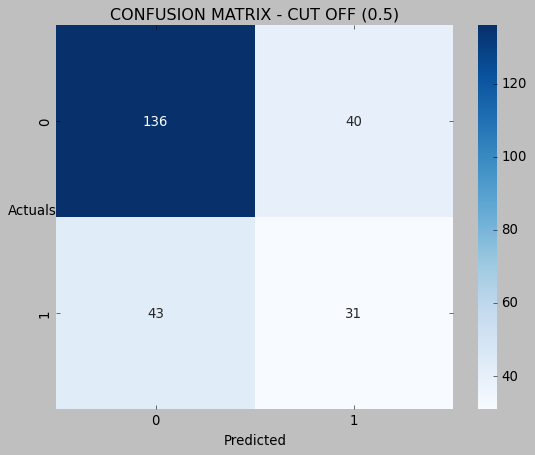

In [31]:
evaluate_test_model(dt_model)

In [36]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset (Example: Replace with your own data)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["Default_Yes", "Default_No"], filled=True)
plt.show()


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object') instead.

<Figure size 960x640 with 0 Axes>

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["Default_Yes", "Default_No"], filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'checking_balance_1 - 200 DM', 'checking_balance_< 0 DM',
       'checking_balance_> 200 DM', 'checking_balance_unknown',
       'credit_history_critical', 'credit_history_good',
       'credit_history_perfect', 'credit_history_poor',
       'credit_history_very good', 'purpose_business', 'purpose_car',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'savings_balance_100 - 500 DM',
       'savings_balance_500 - 1000 DM', 'savings_balance_< 100 DM',
       'savings_balance_> 1000 DM', 'savings_balance_unknown',
       'employment_duration_1 - 4 years', 'employment_duration_4 - 7 years',
       'employment_duration_< 1 year', 'employment_duration_> 7 years',
       'employment_duration_unemployed', 'other_credit_bank',
       'other_credit_none', 'other_credit_store', 'housing_other',
       'housing_own', 'housing_rent', 'job_management', 'job_skilled',
       'job_unemployed', 'job_unskilled', 'phone_no', 'phone_yes'],
      dtype='object') instead.

<Figure size 960x640 with 0 Axes>

### DT Pruning